<a href="https://colab.research.google.com/github/RobaireTH/Drug-Consuption-Classifier-model/blob/main/drug_Drug_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Dataset Info

E. Fehrman, V. Egan, and E. Mirkes. "Drug Consumption (Quantified)," UCI Machine Learning Repository, 2015. [Online]. Available: https://doi.org/10.24432/C5TC7S.

### Problems
* Seven class classifications for each drug separately.
* Problem can be transformed to binary classification by union of part of classes into one new class. For example, "Never Used", "Used over a Decade Ago" form class "Non-user" and all other classes form class "User".
* The best binarization of classes for each attribute.
* Evaluation of risk to be drug consumer for each drug.

In [ ]:
cols = ["id", "age", "gender", "education", "country", "ethnicity", "nscore", "escore", "oscore",
        "ascore", "cscore", "impulsive", "ss", "alcohol", "amphet", "amyl", "benzos", "caff", "cannabis", "choc",
        "coke", "crack", "ecstasy", "heroin", "ketamine", "legalh", "lsd", "meth", "mushrooms", "nicotine", "semer", "vsa"]
df = pd.read_csv("drug_consumption.data", names = cols)
df.head()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Alcohol - VSA = Target COLS

Age - SS = Feature COLS

id = ID

In [ ]:
df.shape

(1885, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1885 non-null   int64  
 1   age        1885 non-null   float64
 2   gender     1885 non-null   float64
 3   education  1885 non-null   float64
 4   country    1885 non-null   float64
 5   ethnicity  1885 non-null   float64
 6   nscore     1885 non-null   float64
 7   escore     1885 non-null   float64
 8   oscore     1885 non-null   float64
 9   ascore     1885 non-null   float64
 10  cscore     1885 non-null   float64
 11  impulsive  1885 non-null   float64
 12  ss         1885 non-null   float64
 13  alcohol    1885 non-null   object 
 14  amphet     1885 non-null   object 
 15  amyl       1885 non-null   object 
 16  benzos     1885 non-null   object 
 17  caff       1885 non-null   object 
 18  cannabis   1885 non-null   object 
 19  choc       1885 non-null   object 
 20  coke    

In [ ]:
df.describe()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
education,0
country,0
ethnicity,0
nscore,0
escore,0
oscore,0
ascore,0


## Prepping the data
Split the dataset and the using SMOTE technique to balance the train data to avoid bias

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score, roc_curve)

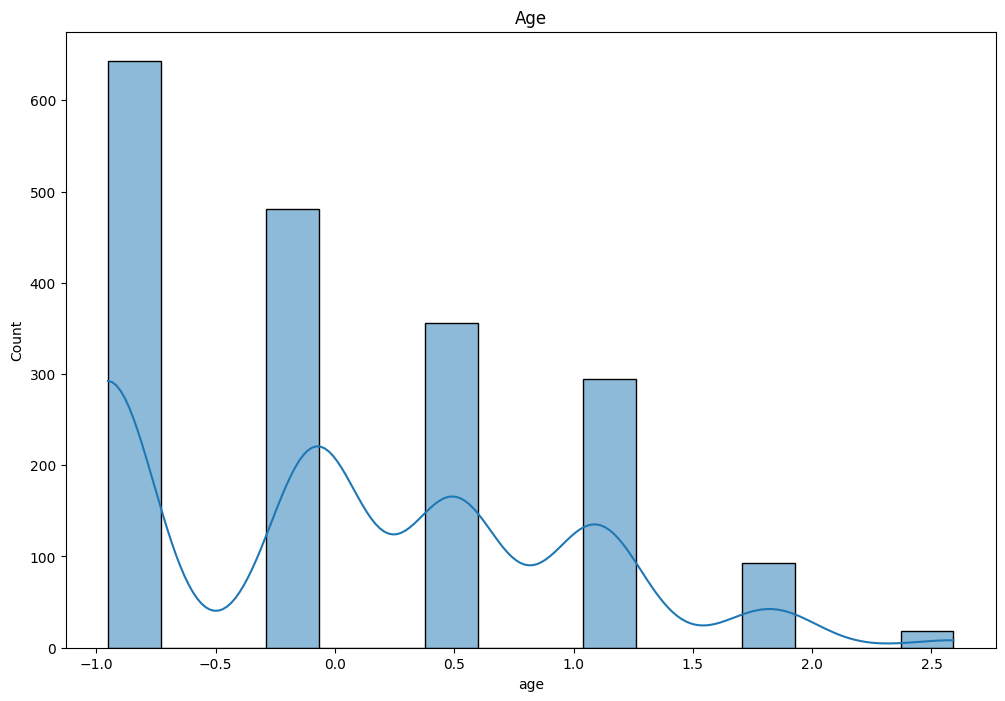

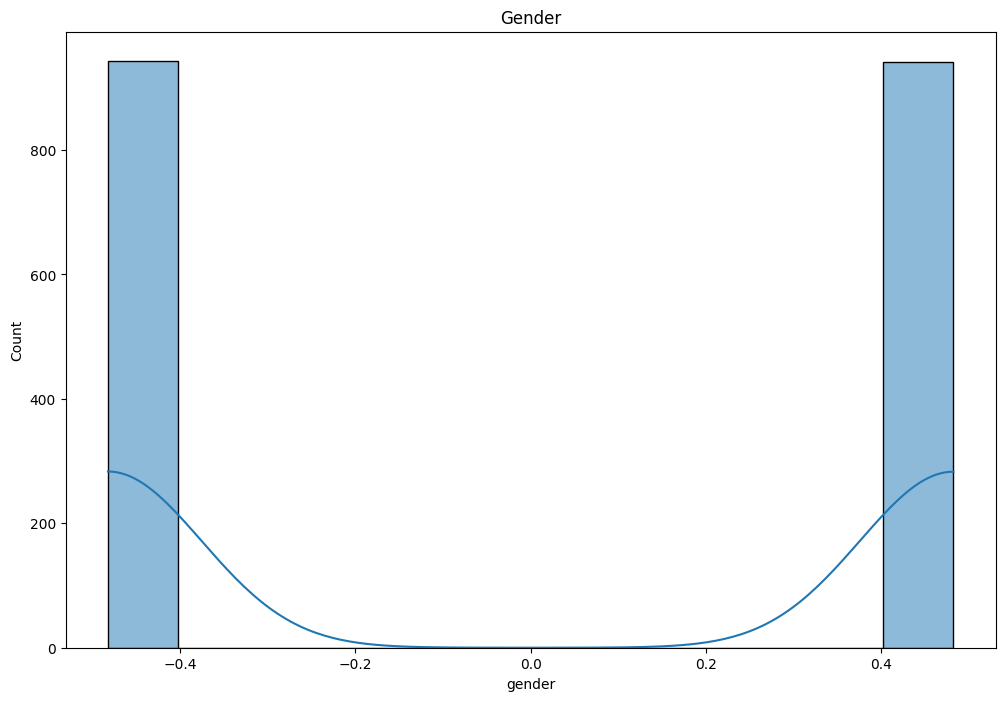

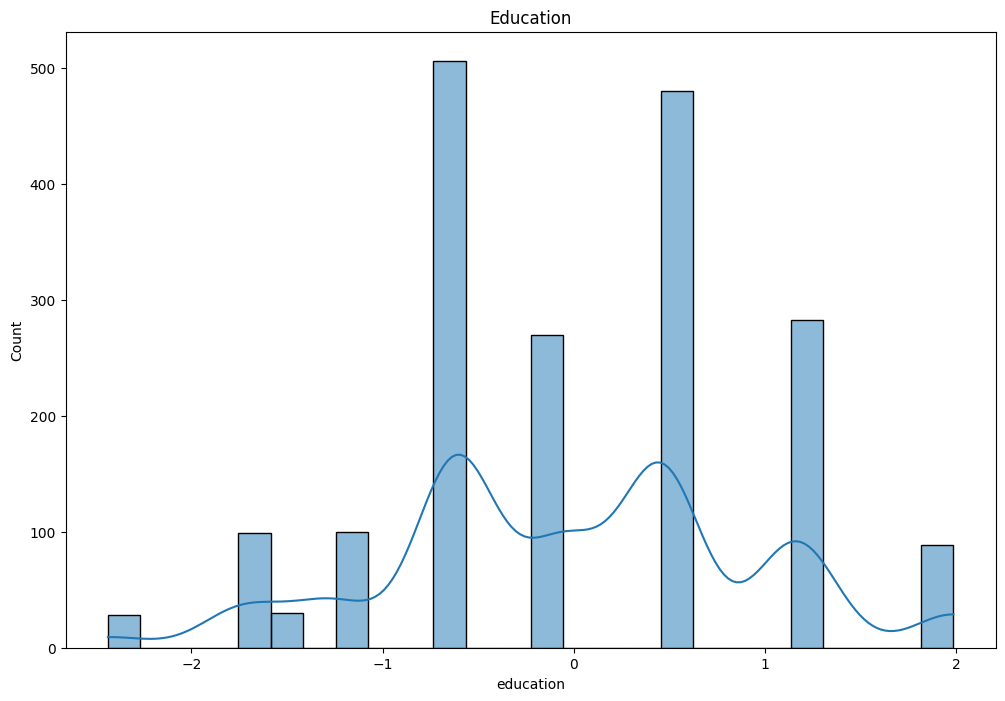

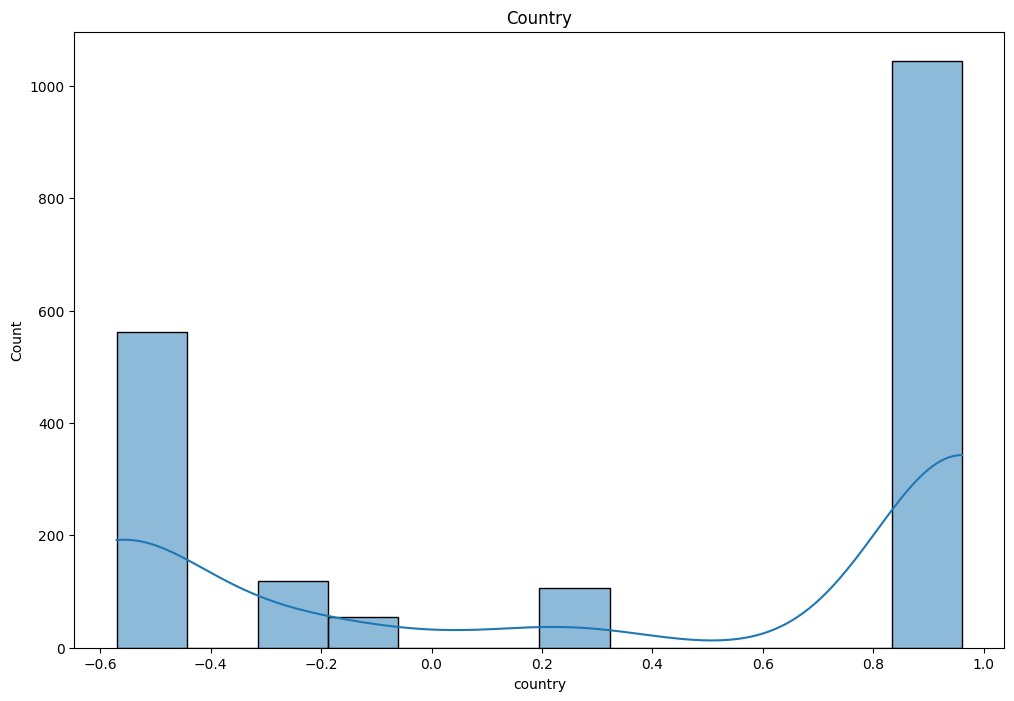

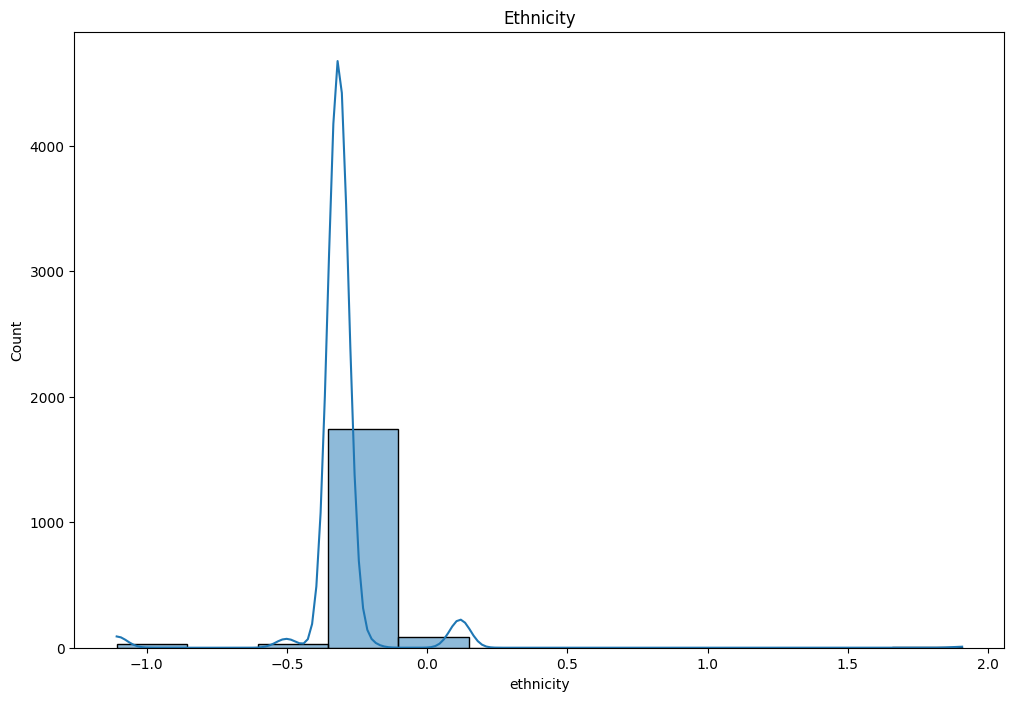

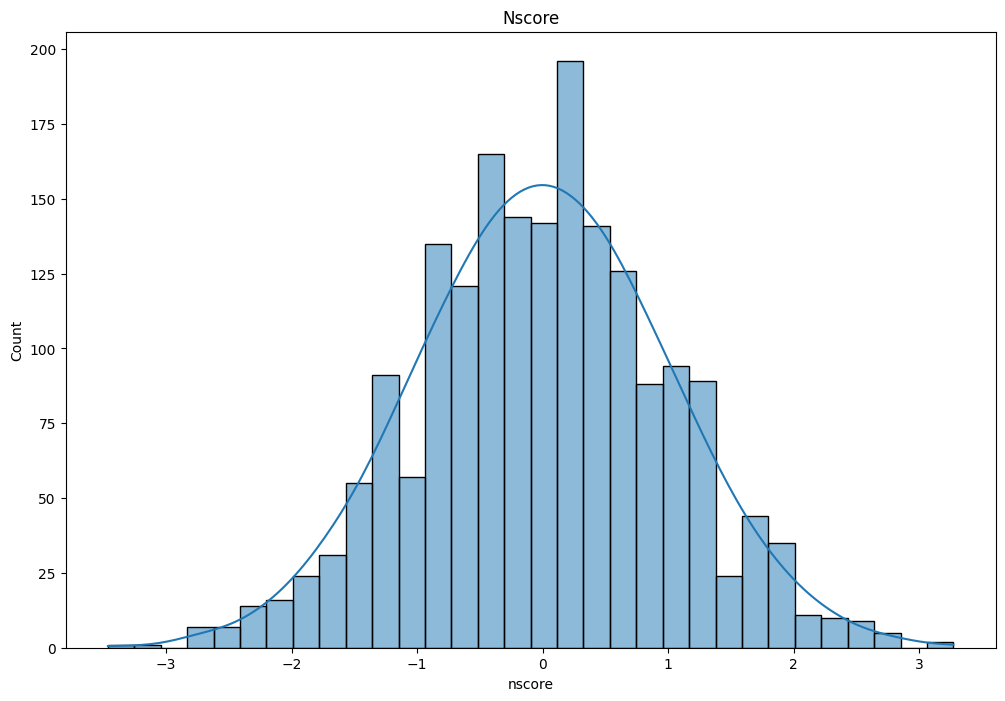

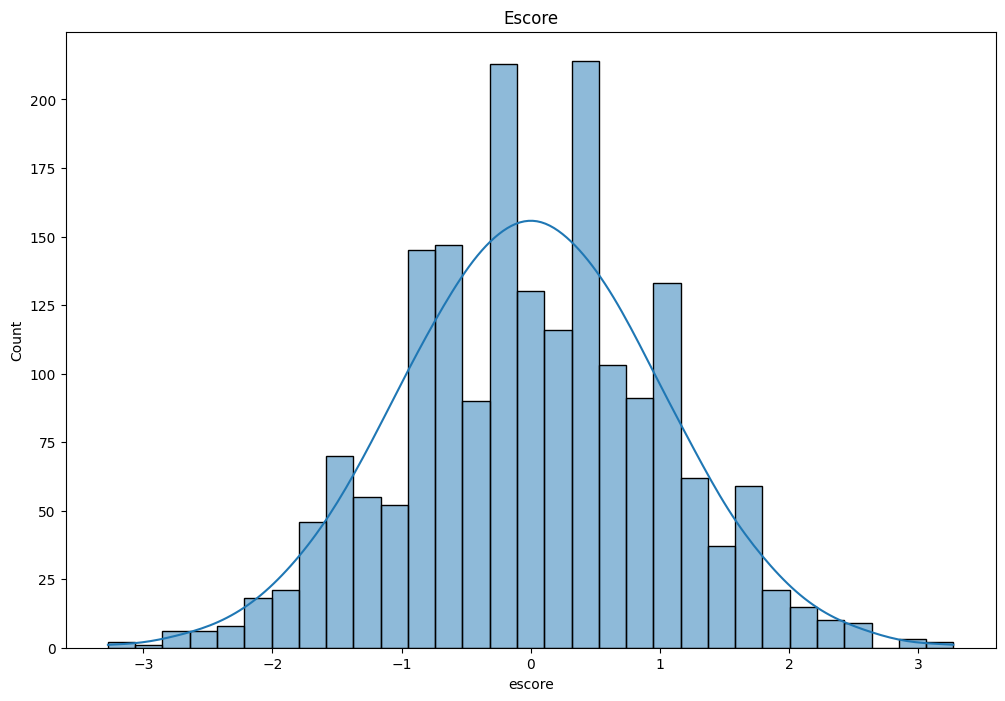

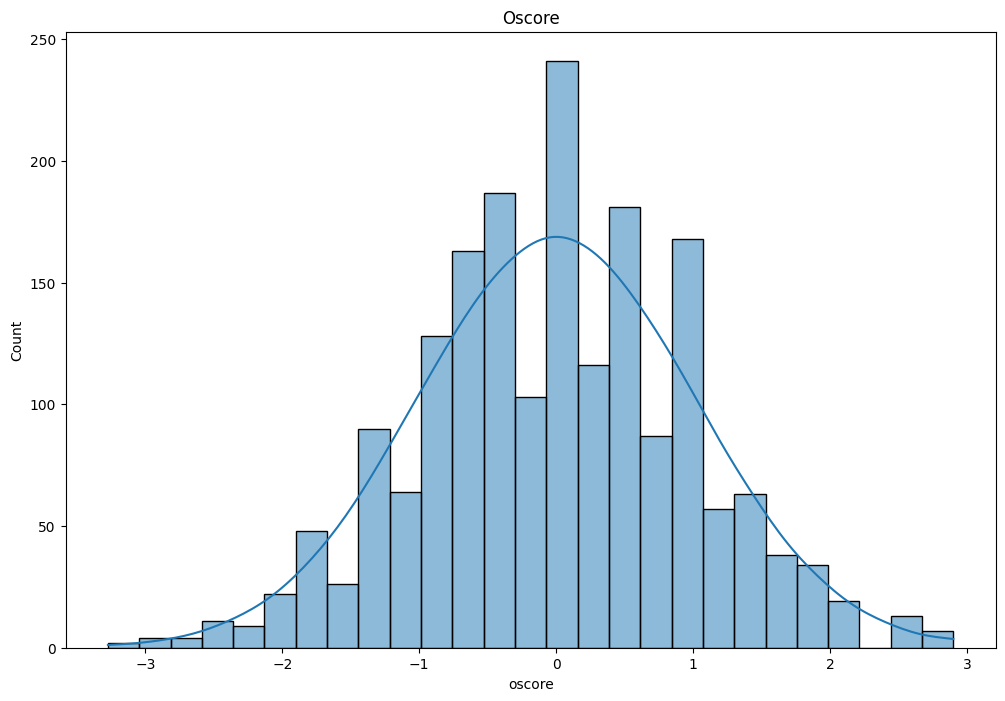

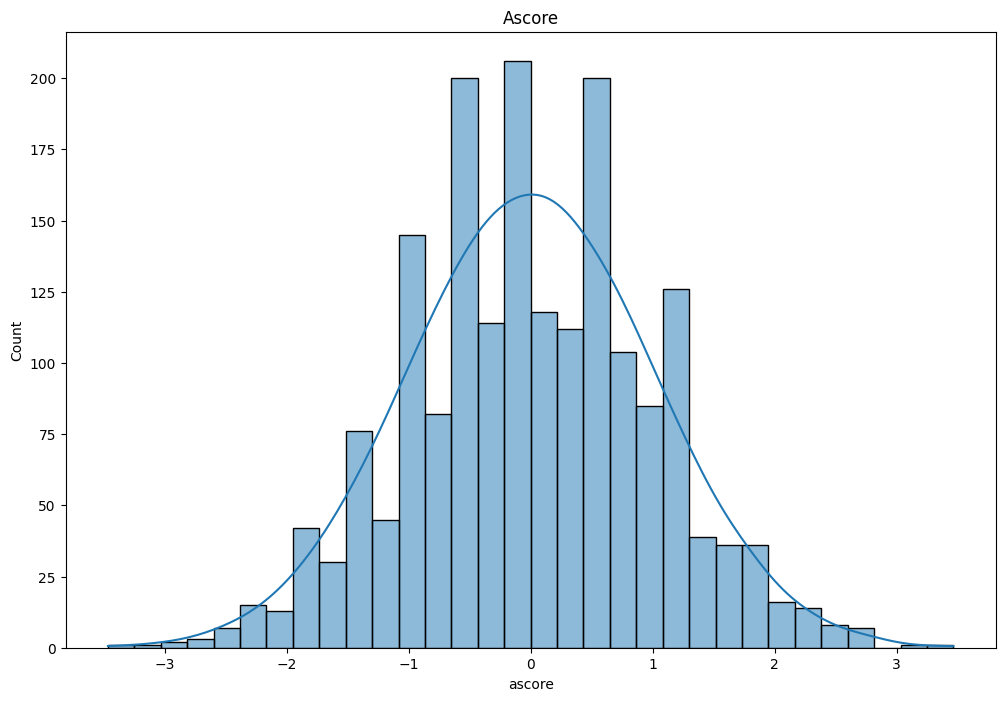

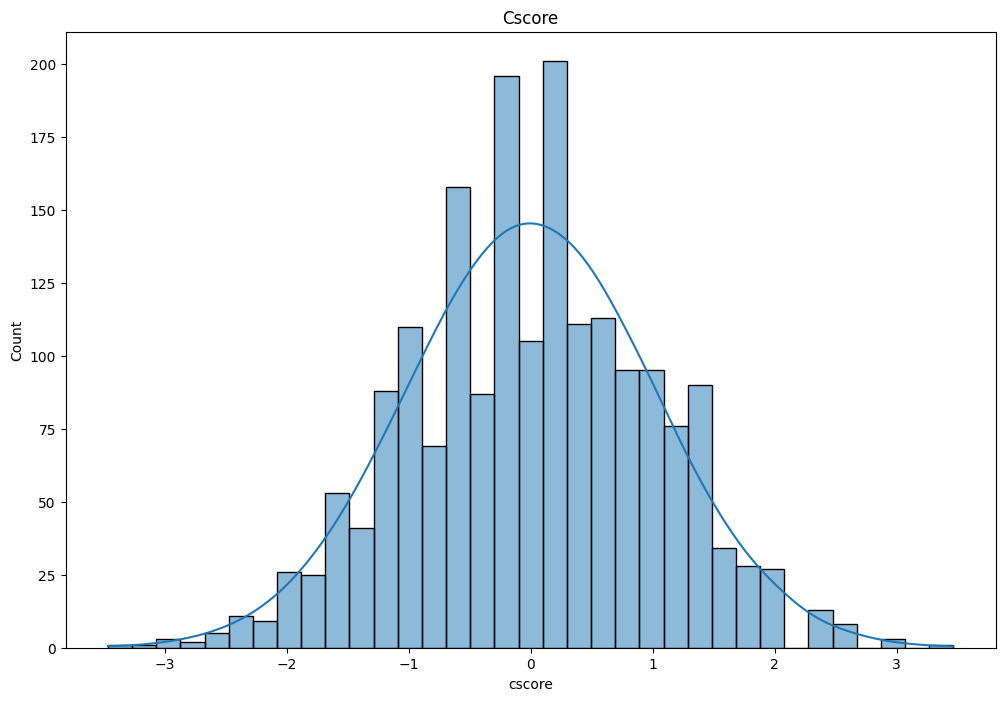

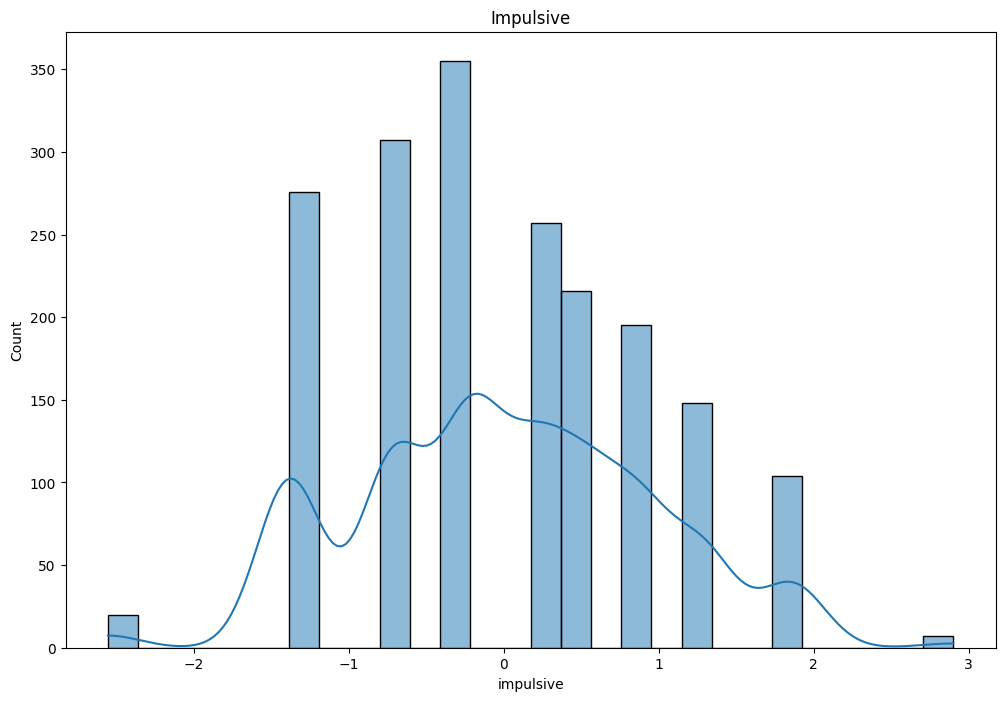

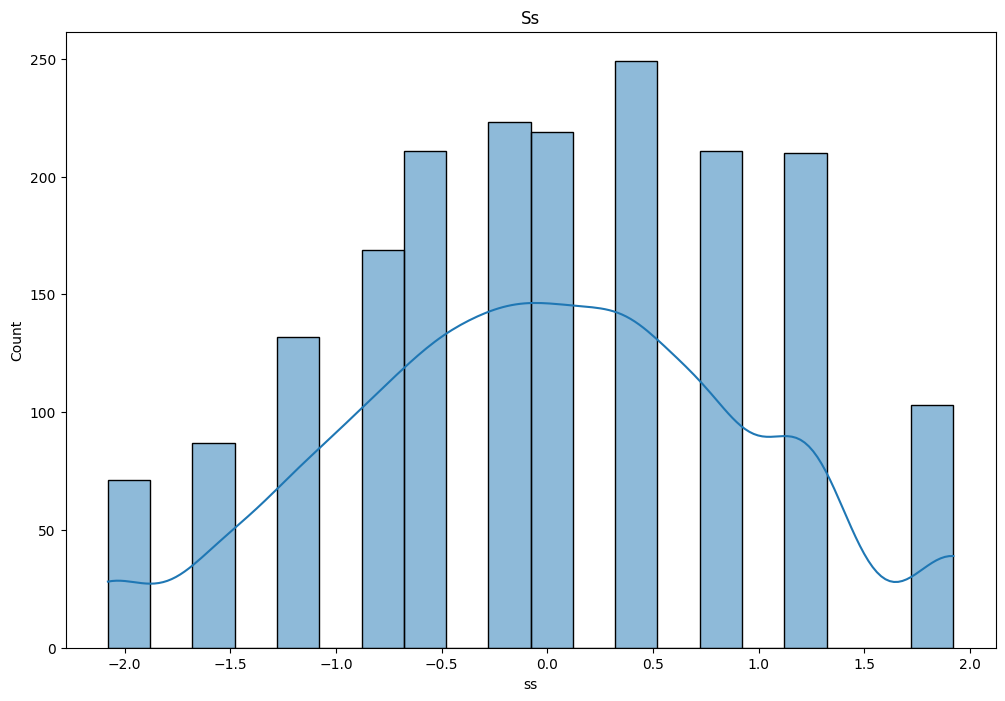

In [ ]:
for col in df.columns[1:13]:
    plt.figure(figsize=(12, 8))
    sns.histplot(df[col], kde=True)
    plt.title(col.capitalize())

In [ ]:
for col in df.columns[13:]:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0


### Quick Note

Now that the data has been pre-processed, it's time to visualize the data correlation and, maybe split the target columns from the features.

Since, ID is number of record in original database, and cannot be related to participant. We can drop that column

In [ ]:
df.drop("id", axis=1, inplace=True)

In [ ]:
targets = df.columns[12:]
y = df[targets]
y

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,5,0,0,0,4,5,4,0,0,0,0,0,3,3,0,0,0,0,5
1881,5,0,0,0,5,3,4,0,0,2,0,0,3,5,4,4,5,0,0
1882,4,6,5,5,6,6,6,4,0,4,0,2,0,2,0,2,6,0,0
1883,5,0,0,0,6,6,5,0,0,3,0,0,3,3,0,3,4,0,0


In [ ]:
X = df.drop(targets.to_list(), axis=1)

In [ ]:
X

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


#### Splitting the train and test data

In [ ]:
X

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


In [ ]:
class Model:
  def __init__(self, model):
    if model:
      self.model = model
    else:
      self.model = xgb.XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)

  def balance_train_data(self, X_train, y_train):
    smote = SMOTE(random_state= 12)
    self.X_train_resampled, self.y_train_resampled = smote.fit_resample(X_train,y_train)

  def train(self):
    self.model.fit(self.X_train_resampled, self.y_train_resampled)

  def predict(self, X_test):
    self.X_test = X_test
    self.y_pred = self.model.predict(X_test)

  def predict_proba(self, X_test):
     self.y_proba = self.model.predict_proba(X_test)[:, 1]

  def evaluate(self, y_test):
    print(confusion_matrix(y_test, self.y_pred))
    print(classification_report(y_test, self.y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, self.y_proba)}")

  def plot_feature_importance(self):
    feature_importance = self.model.feature_importances_
    feature_names = self.X_train_resampled.columns
    sorted_idx = np.argsort(feature_importance)
    plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.show()

  def plot_roc_curve(self):
    fpr, tpr, thresholds = roc_curve(self.y_test, self.y_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

  def dump_model(self):
    import joblib
    joblib.dump(self.model, 'model.pkl')

  def load_model(self):
    import joblib
    self.model = joblib.load('model.pkl')

#### Using the models in iter for the target cols

In [ ]:
for col in y.columns:
    print(f"Model for {col.capitalize()}")
    X_train, X_test, y_train, y_test = train_test_split(X, y[col], test_size=0.2, random_state=42, shuffle=True)

    # Binarize the target variable: 1 for any use, 0 for never used.
    # Assuming that 0 represents 'Never Used' after Label Encoding.
    # This assumption is based on the problem description and the order of classes in the original dataset.
    # If the order is different, this mapping should be adjusted.
    y_train_binary = (y_train > 0).astype(int)
    y_test_binary = (y_test > 0).astype(int)

    model = Model(model=None)
    model.balance_train_data(X_train, y_train_binary) # Balance the binary target
    model.train()
    print(f"Model fitted successfully")
    model.predict(X_test)
    model.predict_proba(X_test)
    print(f"Metrics for {col.capitalize()}")
    # Evaluate using the binary target
    print(confusion_matrix(y_test_binary, model.y_pred))
    print(classification_report(y_test_binary, model.y_pred))
    # Calculate ROC AUC for binary classification
    print(f"ROC AUC Score: {roc_auc_score(y_test_binary, model.y_proba)}")

Model for Alcohol
Model fitted successfully
Metrics for Alcohol
[[  2   5]
 [  2 368]]
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.99      0.99      0.99       370

    accuracy                           0.98       377
   macro avg       0.74      0.64      0.68       377
weighted avg       0.98      0.98      0.98       377

ROC AUC Score: 0.7571428571428571
Model for Amphet
Model fitted successfully
Metrics for Amphet
[[128  68]
 [ 71 110]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       196
           1       0.62      0.61      0.61       181

    accuracy                           0.63       377
   macro avg       0.63      0.63      0.63       377
weighted avg       0.63      0.63      0.63       377

ROC AUC Score: 0.6917916337805841
Model for Amyl
Model fitted successfully
Metrics for Amyl
[[223  38]
 [ 71  45]]
              precision  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model fitted successfully
Metrics for Vsa
[[249  40]
 [ 67  21]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       289
           1       0.34      0.24      0.28        88

    accuracy                           0.72       377
   macro avg       0.57      0.55      0.55       377
weighted avg       0.68      0.72      0.70       377

ROC AUC Score: 0.6567316766278705
